In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans

In [2]:
data=pd.read_csv("wine.csv")
data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
data.shape

(178, 14)

In [4]:
data.columns

Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

In [5]:
data.isna().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [7]:
data.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


<AxesSubplot:>

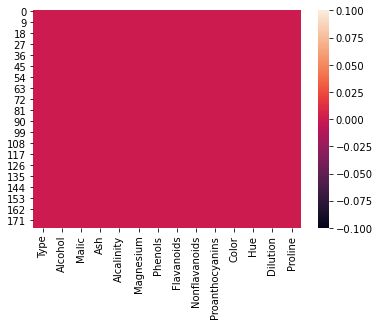

In [8]:
sns.heatmap(data.isna())#no null value in data set

# EDA

In [9]:
#remove type column in dataset
data.drop(data.columns[0],axis=1, inplace=True)
data.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


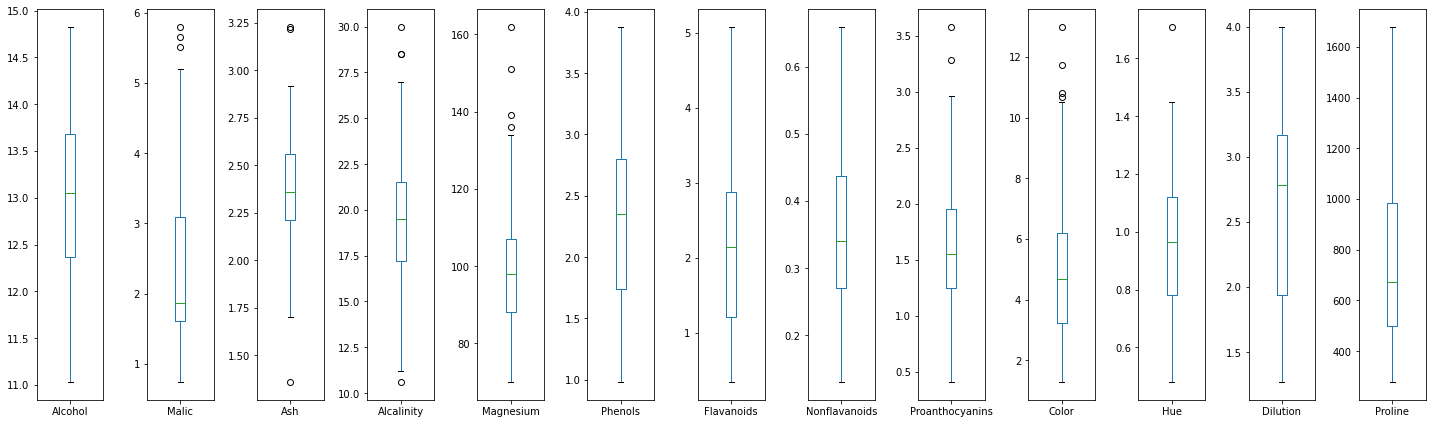

In [10]:
#Most of  observed outliers is present. Eliminate the outliers for better accuracy or prediction of model
data.plot(kind='box', subplots=True, figsize=(20,6))
plt.tight_layout()

In [11]:
#Remove outlier
data.drop(data.index[data['Malic']>5], inplace=True)
data.drop(data.index[data['Ash']>3], inplace=True)
data.drop(data.index[data['Ash']<1.8], inplace=True)
data.drop(data.index[data['Alcalinity']>25], inplace=True)
data.drop(data.index[data['Alcalinity']<11], inplace=True)
data.drop(data.index[data['Magnesium']>132], inplace=True)
data.drop(data.index[data['Proanthocyanins']>2.5], inplace=True)
data.drop(data.index[data['Color']>10.5], inplace=True)
data.drop(data.index[data['Hue']>1.6], inplace=True)

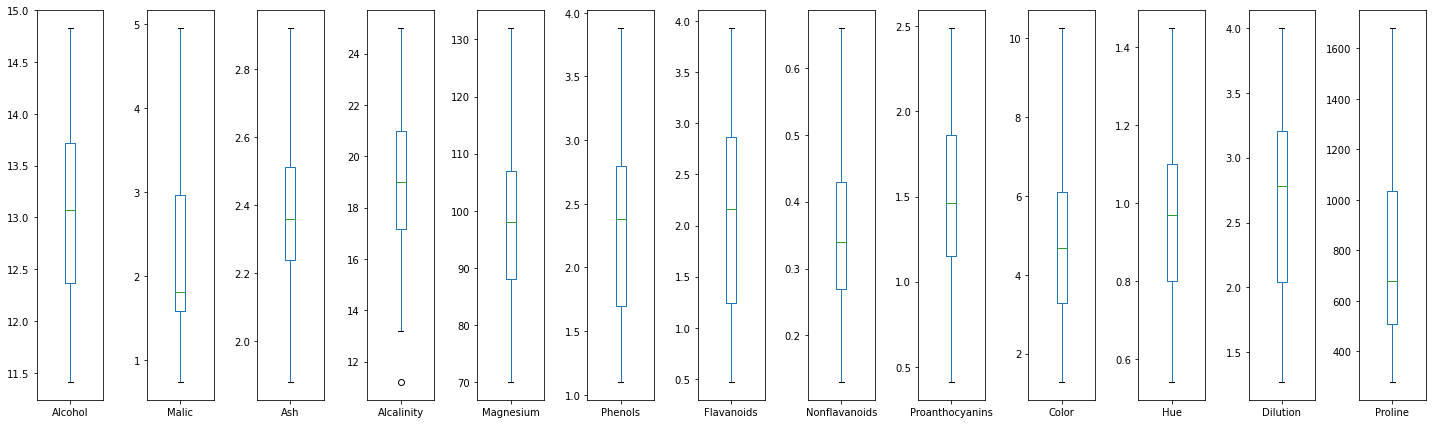

In [12]:
data.plot(kind='box', subplots=True, figsize=(20,6))
plt.tight_layout()# no outlier in data 

In [13]:
#Standardizing Dataset
scale = MinMaxScaler()
data_std = scale.fit_transform(data)
data_std = pd.DataFrame(data_std, columns=data.columns)
data_std.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,0.824561,0.230404,0.528846,0.318841,0.919355,0.611511,0.748555,0.283019,0.903846,0.485523,0.549451,0.970696,0.561341
1,0.523392,0.247031,0.250000,0.000000,0.483871,0.557554,0.661850,0.245283,0.418269,0.345212,0.560440,0.780220,0.550642
2,0.865497,0.287411,0.596154,0.405797,0.693548,0.989209,0.872832,0.207547,0.850962,0.726058,0.351648,0.798535,0.857347
3,0.535088,0.439430,0.951923,0.710145,0.774194,0.611511,0.641618,0.490566,0.677885,0.338530,0.549451,0.608059,0.325963
4,0.815789,0.242280,0.548077,0.289855,0.677419,0.780576,0.843931,0.396226,0.750000,0.609131,0.560440,0.578755,0.835949


In [14]:
data_std.shape

(144, 13)

# Applying PCA

In [15]:
#Applying PCA to reduce dimensions
pca = PCA(random_state=40)
pca_values = pca.fit_transform(data_std)

In [16]:
pca_values

array([[-0.84010844, -0.297656  , -0.04532235, ..., -0.07718492,
         0.06492511,  0.02255496],
       [-0.5074675 ,  0.0831343 , -0.42054686, ..., -0.100973  ,
        -0.00670464, -0.03320524],
       [-0.94453211, -0.59992051, -0.08691626, ...,  0.13414915,
         0.01601052,  0.1019365 ],
       ...,
       [ 0.69793306, -0.76229205, -0.24543002, ...,  0.01564559,
         0.22499182,  0.02466596],
       [ 0.61774111, -0.59533002, -0.09466748, ...,  0.03319345,
         0.13464388,  0.05458268],
       [ 0.76741198, -0.71623266,  0.3149208 , ..., -0.05426711,
        -0.05443203,  0.07722431]])

In [17]:
# The amount of variance that each PCA has
var = pca.explained_variance_ratio_
var

array([0.42832182, 0.20348286, 0.07456962, 0.06778167, 0.04488708,
       0.04150387, 0.0324845 , 0.02543712, 0.02246272, 0.02212112,
       0.01545003, 0.01353629, 0.0079613 ])

In [18]:
# Cummulative variance of each PCA
var1=np.cumsum(np.round(var,4)*100)
var1

array([ 42.83,  63.18,  70.64,  77.42,  81.91,  86.06,  89.31,  91.85,
        94.1 ,  96.31,  97.86,  99.21, 100.01])

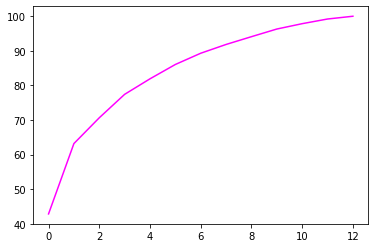

In [19]:
# Variance plot for PCA components obtained 
plt.plot(var1,color='magenta')

In [20]:
#First 3 principal components have more contribution i.e about 72%.
#So we are considering first 3 components for the building model.
pca_values[:,:3]

array([[-8.40108441e-01, -2.97655998e-01, -4.53223504e-02],
       [-5.07467499e-01,  8.31343014e-02, -4.20546864e-01],
       [-9.44532109e-01, -5.99920511e-01, -8.69162581e-02],
       [-2.83723311e-01, -1.83858787e-01,  5.34439608e-01],
       [-7.59089813e-01, -4.60052280e-01, -6.21749347e-02],
       [-6.11008577e-01, -2.38169559e-01, -1.17149764e-01],
       [-4.99515599e-01, -3.51945227e-01,  1.52433169e-01],
       [-6.19289734e-01, -1.87823927e-01, -3.34458596e-01],
       [-6.95504664e-01, -1.52477763e-01, -2.63085860e-01],
       [-8.65463376e-01, -2.62824313e-01, -7.19078093e-02],
       [-4.16230921e-01, -1.15275917e-01, -1.36089853e-01],
       [-5.19531682e-01, -1.26953704e-01, -7.96673258e-02],
       [-5.68369614e-01, -3.72505830e-01,  2.20449518e-01],
       [-5.66786923e-01, -5.08544912e-01,  2.98755548e-01],
       [-5.04254070e-01, -3.41541268e-01,  2.79301888e-01],
       [-8.97853052e-01, -5.48000954e-01,  1.88133102e-03],
       [-5.24079646e-01, -2.72016022e-01

In [21]:
#Creating dataset using PCA (first 3 components)
wine_data_pca =pd.DataFrame(pca_values[:,:3], columns=['PC1', 'PC2', 'PC3'])
wine_data_pca.head(10)

,PC1,PC2,PC3
0,-0.840108,-0.297656,-0.045322
1,-0.507467,0.083134,-0.420547
2,-0.944532,-0.599921,-0.086916
3,-0.283723,-0.183859,0.534440
4,-0.759090,-0.460052,-0.062175
5,-0.611009,-0.238170,-0.117150
6,-0.499516,-0.351945,0.152433
7,-0.619290,-0.187824,-0.334459
8,-0.695505,-0.152478,-0.263086
9,-0.865463,-0.262824,-0.071908


<AxesSubplot:>

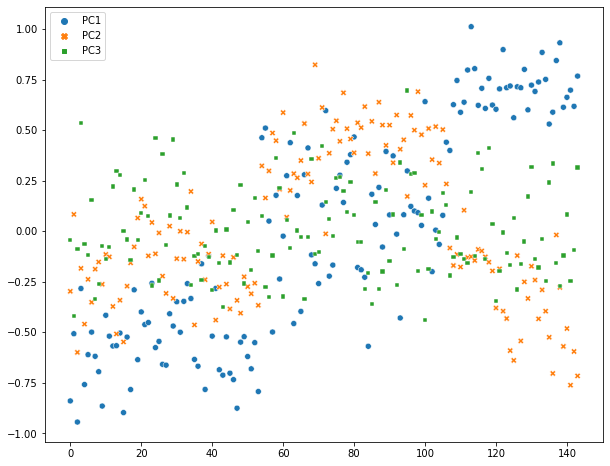

In [22]:
# Visualization of PCAs
fig=plt.figure(figsize=(10,8))
sns.scatterplot(data=wine_data_pca)

# Checking with other Clustering Algorithms

# Hierarchical Clustering with PCA

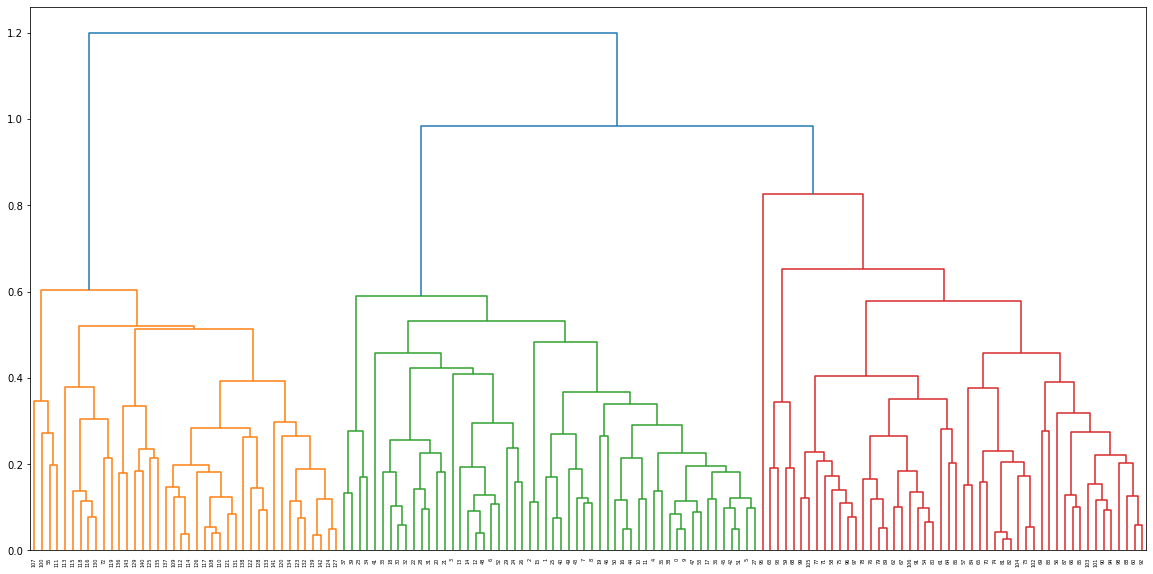

In [23]:
#Building Model
plt.figure(figsize=(20,10))
dendrogram=sch.dendrogram(sch.linkage(wine_data_pca, method='average'))

In [24]:
#From above dendrogram, we can see that '3' number of clusters are formed.
hc = AgglomerativeClustering(n_clusters=3)

In [25]:
wine_data_hc=hc.fit(wine_data_pca)
wine_data_hc.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [26]:
#Calculating 'Silhouette' Score
import sklearn
round(sklearn.metrics.silhouette_score(wine_data_pca, wine_data_hc.labels_),4)

0.477

In [27]:
#Adding Cluster column in the data
wine_data_pca['ClusterID_HC']=wine_data_hc.labels_
wine_data_pca.head()

,PC1,PC2,PC3,ClusterID_HC
0,-0.840108,-0.297656,-0.045322,1
1,-0.507467,0.083134,-0.420547,1
2,-0.944532,-0.599921,-0.086916,1
3,-0.283723,-0.183859,0.534440,1
4,-0.759090,-0.460052,-0.062175,1


In [28]:
#Grouping clusters
wine_data_pca.groupby('ClusterID_HC').mean()

,PC1,PC2,PC3
ClusterID_HC,,,
0,0.110891,0.434107,-0.008071
1,-0.541089,-0.165267,0.019258
2,0.701337,-0.315831,-0.019501


In [29]:
wine_data_pca['ClusterID_HC'].value_counts()


1    58
0    49
2    37
Name: ClusterID_HC, dtype: int64

# Hierarchical Clustering without PCA

In [30]:
#Hierarchical Clustering without PCA
data_std.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,0.824561,0.230404,0.528846,0.318841,0.919355,0.611511,0.748555,0.283019,0.903846,0.485523,0.549451,0.970696,0.561341
1,0.523392,0.247031,0.250000,0.000000,0.483871,0.557554,0.661850,0.245283,0.418269,0.345212,0.560440,0.780220,0.550642
2,0.865497,0.287411,0.596154,0.405797,0.693548,0.989209,0.872832,0.207547,0.850962,0.726058,0.351648,0.798535,0.857347
3,0.535088,0.439430,0.951923,0.710145,0.774194,0.611511,0.641618,0.490566,0.677885,0.338530,0.549451,0.608059,0.325963
4,0.815789,0.242280,0.548077,0.289855,0.677419,0.780576,0.843931,0.396226,0.750000,0.609131,0.560440,0.578755,0.835949


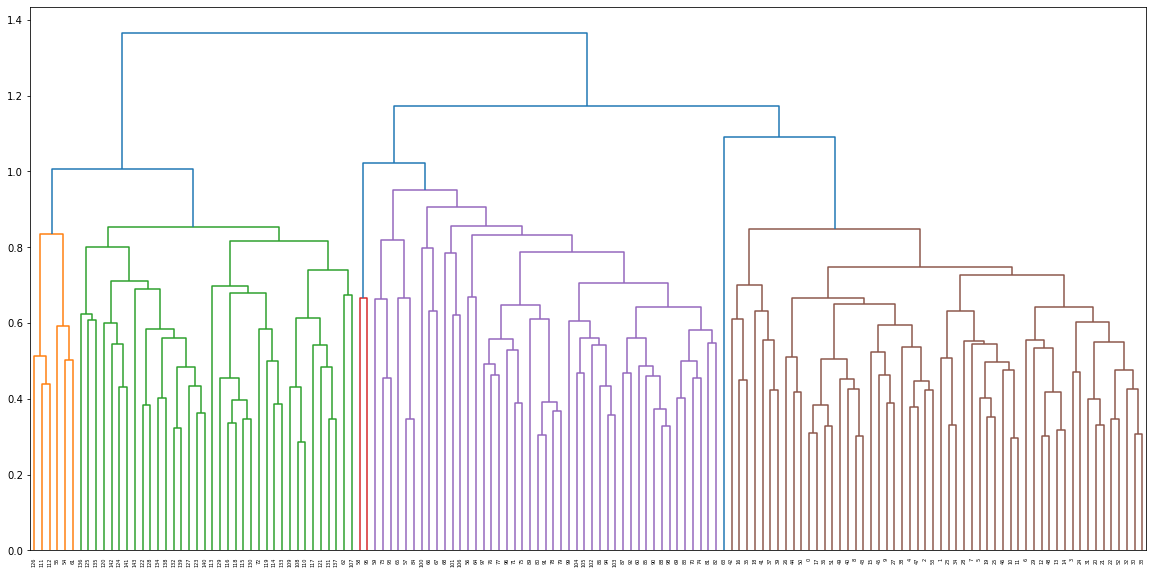

In [31]:
plt.figure(figsize=(20,10))
dendrogram=sch.dendrogram(sch.linkage(data_std, method='average'))

In [32]:
#From above dendrogram, we are selecting number of clusters as '7'.
hc=AgglomerativeClustering(n_clusters=7)

In [33]:
wine_data_hc1=hc.fit(data_std)
wine_data_hc1.labels_

array([2, 4, 2, 4, 2, 4, 4, 4, 2, 2, 4, 4, 4, 4, 4, 2, 2, 2, 1, 4, 4, 4,
       4, 4, 4, 4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 2, 2, 1, 4, 1, 2, 1, 2, 2,
       2, 2, 4, 2, 4, 2, 2, 2, 4, 2, 0, 0, 5, 1, 6, 4, 5, 0, 0, 1, 5, 1,
       5, 5, 1, 5, 5, 6, 0, 1, 5, 6, 6, 6, 6, 6, 6, 5, 5, 5, 1, 5, 1, 5,
       5, 6, 5, 6, 5, 1, 1, 6, 6, 6, 5, 5, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 3, 3, 0, 3, 0, 0, 0, 0,
       3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3], dtype=int64)

In [34]:
#Calculating 'Silhoutte' Score
round(sklearn.metrics.silhouette_score(data_std, wine_data_hc1.labels_),4)

0.1264

In [35]:
#Adding cluster column
data_std['ClusterID']=wine_data_hc1.labels_
data_std.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,ClusterID
0,0.824561,0.230404,0.528846,0.318841,0.919355,0.611511,0.748555,0.283019,0.903846,0.485523,0.549451,0.970696,0.561341,2
1,0.523392,0.247031,0.250000,0.000000,0.483871,0.557554,0.661850,0.245283,0.418269,0.345212,0.560440,0.780220,0.550642,4
2,0.865497,0.287411,0.596154,0.405797,0.693548,0.989209,0.872832,0.207547,0.850962,0.726058,0.351648,0.798535,0.857347,2
3,0.535088,0.439430,0.951923,0.710145,0.774194,0.611511,0.641618,0.490566,0.677885,0.338530,0.549451,0.608059,0.325963,4
4,0.815789,0.242280,0.548077,0.289855,0.677419,0.780576,0.843931,0.396226,0.750000,0.609131,0.560440,0.578755,0.835949,2


In [36]:
#Grouping Clusters
data_std.groupby('ClusterID').mean()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
ClusterID,,,,,,,,,,,,,
0,0.435568,0.516712,0.449176,0.644669,0.438940,0.201053,0.102085,0.637466,0.242788,0.435611,0.272606,0.184328,0.240167
1,0.322099,0.410551,0.449393,0.669336,0.369270,0.572510,0.605111,0.322741,0.640435,0.226351,0.438404,0.659148,0.222464
2,0.732988,0.290434,0.475962,0.405138,0.666422,0.714192,0.802417,0.240137,0.805288,0.565651,0.523976,0.716450,0.615160
3,0.571540,0.637371,0.544872,0.748792,0.525806,0.190408,0.106166,0.524528,0.393910,0.868894,0.098901,0.138462,0.269139
4,0.645997,0.244082,0.612401,0.439530,0.543382,0.562019,0.664441,0.341574,0.606764,0.407035,0.623721,0.668814,0.588470
5,0.274204,0.215888,0.176816,0.570048,0.336022,0.371703,0.425177,0.339623,0.491186,0.188753,0.610501,0.614571,0.132826
6,0.201529,0.218162,0.528107,0.750279,0.263027,0.271168,0.363050,0.679245,0.475592,0.174148,0.611158,0.489152,0.154998


# Observation:


Silhouette score (Hierarchical Clustering) :

With PCA :- 0.477

Without PCA :- 0.1264

From this, we can say that Hierarchical clustering model done with the help of PCA is better than without PCA.

# Kmeans with PCA

In [37]:
#Kmeans with PCA
wine_data_pca.drop(wine_data_pca.columns[-1], axis=1, inplace=True)
wine_data_pca.head()

,PC1,PC2,PC3
0,-0.840108,-0.297656,-0.045322
1,-0.507467,0.083134,-0.420547
2,-0.944532,-0.599921,-0.086916
3,-0.283723,-0.183859,0.534440
4,-0.759090,-0.460052,-0.062175


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


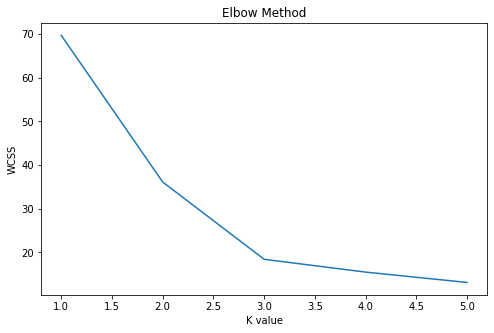

In [38]:
#'Elbow' curve
plt.figure(figsize=[8,5])

wcss=[]
for i in range(1,6):
    kmeans=KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(wine_data_pca)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,6), wcss)
plt.title('Elbow Method')
plt.xlabel('K value')
plt.ylabel('WCSS')
plt.show()

In [39]:
#From above elbow method curve, we will select K value as '3'.
wine_kmeans=KMeans(n_clusters=3).fit(wine_data_pca)
wine_kmeans

KMeans(n_clusters=3)

In [40]:
wine_kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [41]:
#Calculating 'Silhouette' score
round(sklearn.metrics.silhouette_score(wine_data_pca, wine_kmeans.labels_),4)

0.4914

In [42]:
#Adding cluster column
wine_data_pca['ClusterID_kmeans']=wine_kmeans.labels_

In [43]:
wine_data_pca.head()

,PC1,PC2,PC3,ClusterID_kmeans
0,-0.840108,-0.297656,-0.045322,0
1,-0.507467,0.083134,-0.420547,0
2,-0.944532,-0.599921,-0.086916,0
3,-0.283723,-0.183859,0.534440,0
4,-0.759090,-0.460052,-0.062175,0


In [44]:
#Grouping cluster
wine_data_pca.groupby('ClusterID_kmeans').mean()

,PC1,PC2,PC3
ClusterID_kmeans,,,
0,-0.556591,-0.179607,-0.000004
1,0.693474,-0.279754,-0.039352
2,0.071461,0.442670,0.032798


# Kmeans without PCA

In [45]:
#Kmeans without PCA
data_std.drop(data_std.columns[-1], axis=1, inplace=True)
data_std.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,0.824561,0.230404,0.528846,0.318841,0.919355,0.611511,0.748555,0.283019,0.903846,0.485523,0.549451,0.970696,0.561341
1,0.523392,0.247031,0.250000,0.000000,0.483871,0.557554,0.661850,0.245283,0.418269,0.345212,0.560440,0.780220,0.550642
2,0.865497,0.287411,0.596154,0.405797,0.693548,0.989209,0.872832,0.207547,0.850962,0.726058,0.351648,0.798535,0.857347
3,0.535088,0.439430,0.951923,0.710145,0.774194,0.611511,0.641618,0.490566,0.677885,0.338530,0.549451,0.608059,0.325963
4,0.815789,0.242280,0.548077,0.289855,0.677419,0.780576,0.843931,0.396226,0.750000,0.609131,0.560440,0.578755,0.835949


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


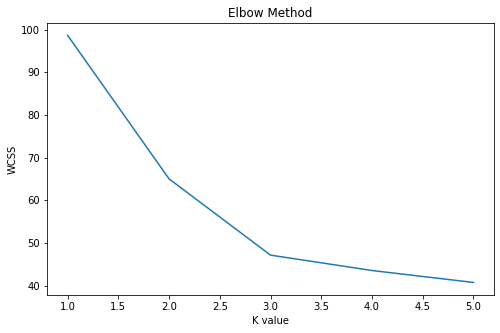

In [46]:
#'Elbow' Curve
plt.figure(figsize=[8,5])

wcss=[]
for i in range(1,6):
    kmeans=KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(data_std)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,6), wcss)
plt.title('Elbow Method')
plt.xlabel('K value')
plt.ylabel('WCSS')
plt.show()

In [47]:
#above elbow method curve, we will select K value '3'
wine_kmeans1=KMeans(n_clusters=3).fit(data_std)
wine_kmeans1.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [48]:
#Calculating 'Silhouette' score
round(sklearn.metrics.silhouette_score(data_std, wine_kmeans1.labels_),4)

0.3148

In [49]:
#Adding cluster column in the data
data_std['ClusterID']=wine_kmeans1.labels_
data_std.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,ClusterID
0,0.824561,0.230404,0.528846,0.318841,0.919355,0.611511,0.748555,0.283019,0.903846,0.485523,0.549451,0.970696,0.561341,2
1,0.523392,0.247031,0.250000,0.000000,0.483871,0.557554,0.661850,0.245283,0.418269,0.345212,0.560440,0.780220,0.550642,2
2,0.865497,0.287411,0.596154,0.405797,0.693548,0.989209,0.872832,0.207547,0.850962,0.726058,0.351648,0.798535,0.857347,2
3,0.535088,0.439430,0.951923,0.710145,0.774194,0.611511,0.641618,0.490566,0.677885,0.338530,0.549451,0.608059,0.325963,2
4,0.815789,0.242280,0.548077,0.289855,0.677419,0.780576,0.843931,0.396226,0.750000,0.609131,0.560440,0.578755,0.835949,2


In [50]:
#Grouping Clusters
data_std.groupby('ClusterID').mean()


,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
ClusterID,,,,,,,,,,,,,
0,0.491959,0.592221,0.489663,0.696196,0.462500,0.190737,0.096821,0.588208,0.304928,0.615033,0.185165,0.166209,0.242903
1,0.243056,0.243666,0.365184,0.646588,0.334005,0.390588,0.437199,0.462264,0.516426,0.185250,0.554625,0.558837,0.163487
2,0.677840,0.297039,0.543784,0.442676,0.581221,0.628790,0.721150,0.290431,0.682606,0.463351,0.570840,0.694074,0.579109


In [51]:
data_std['ClusterID'].value_counts()


2    56
1    48
0    40
Name: ClusterID, dtype: int64

# Observation :


Silhouette score (KMeans Clustering) :

With PCA :- 0.4914

Without PCA :- 0.3157

From this, we can say that KMeans clustering model done with the help of PCA is better than without PCA.